no display found. Using non-interactive Agg backend
{'model': {'beta': {'descr': 'Infection rate', 'range': [0, 1], 'optional': False}, 'gamma': {'descr': 'Recovery rate', 'range': [0, 1], 'optional': False}, 'tp_rate': {'descr': 'Whether if the infection rate depends on the number of infected neighbors', 'range': [0, 1], 'optional': True, 'default': 1}}, 'nodes': {}, 'edges': {}}


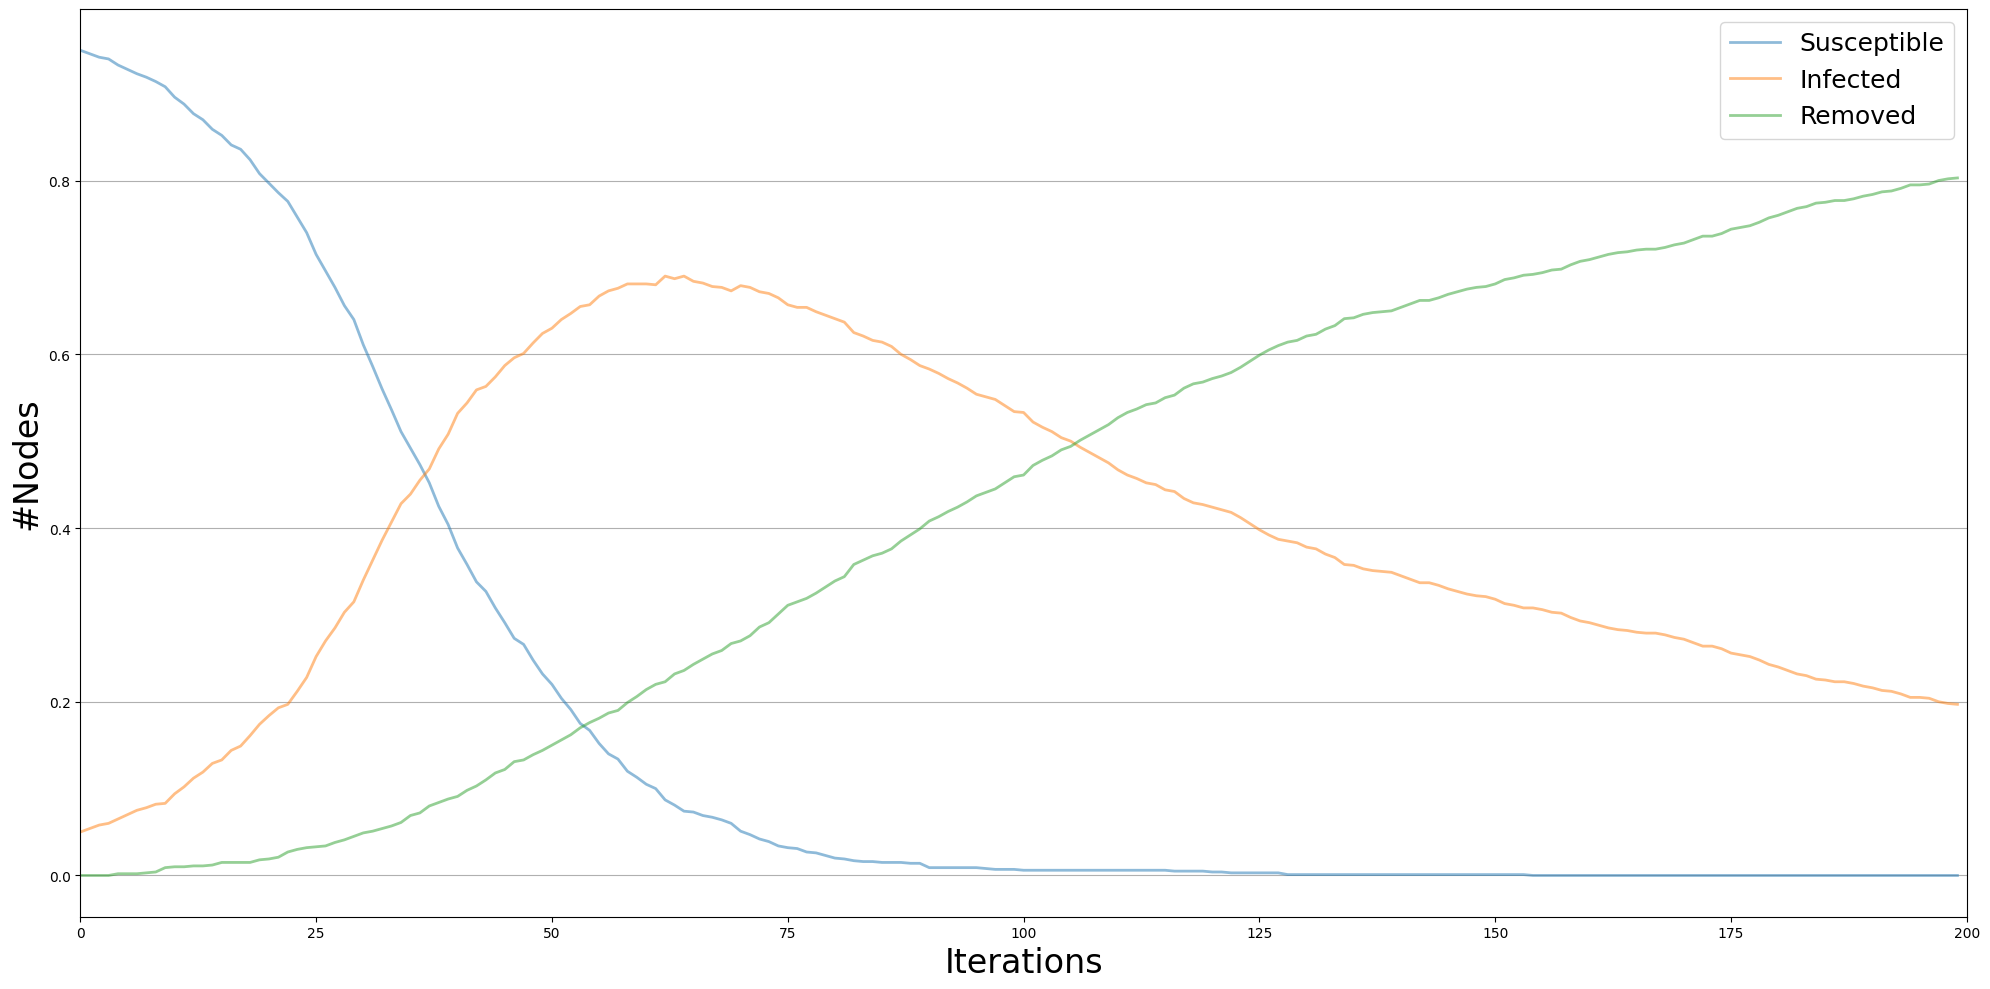

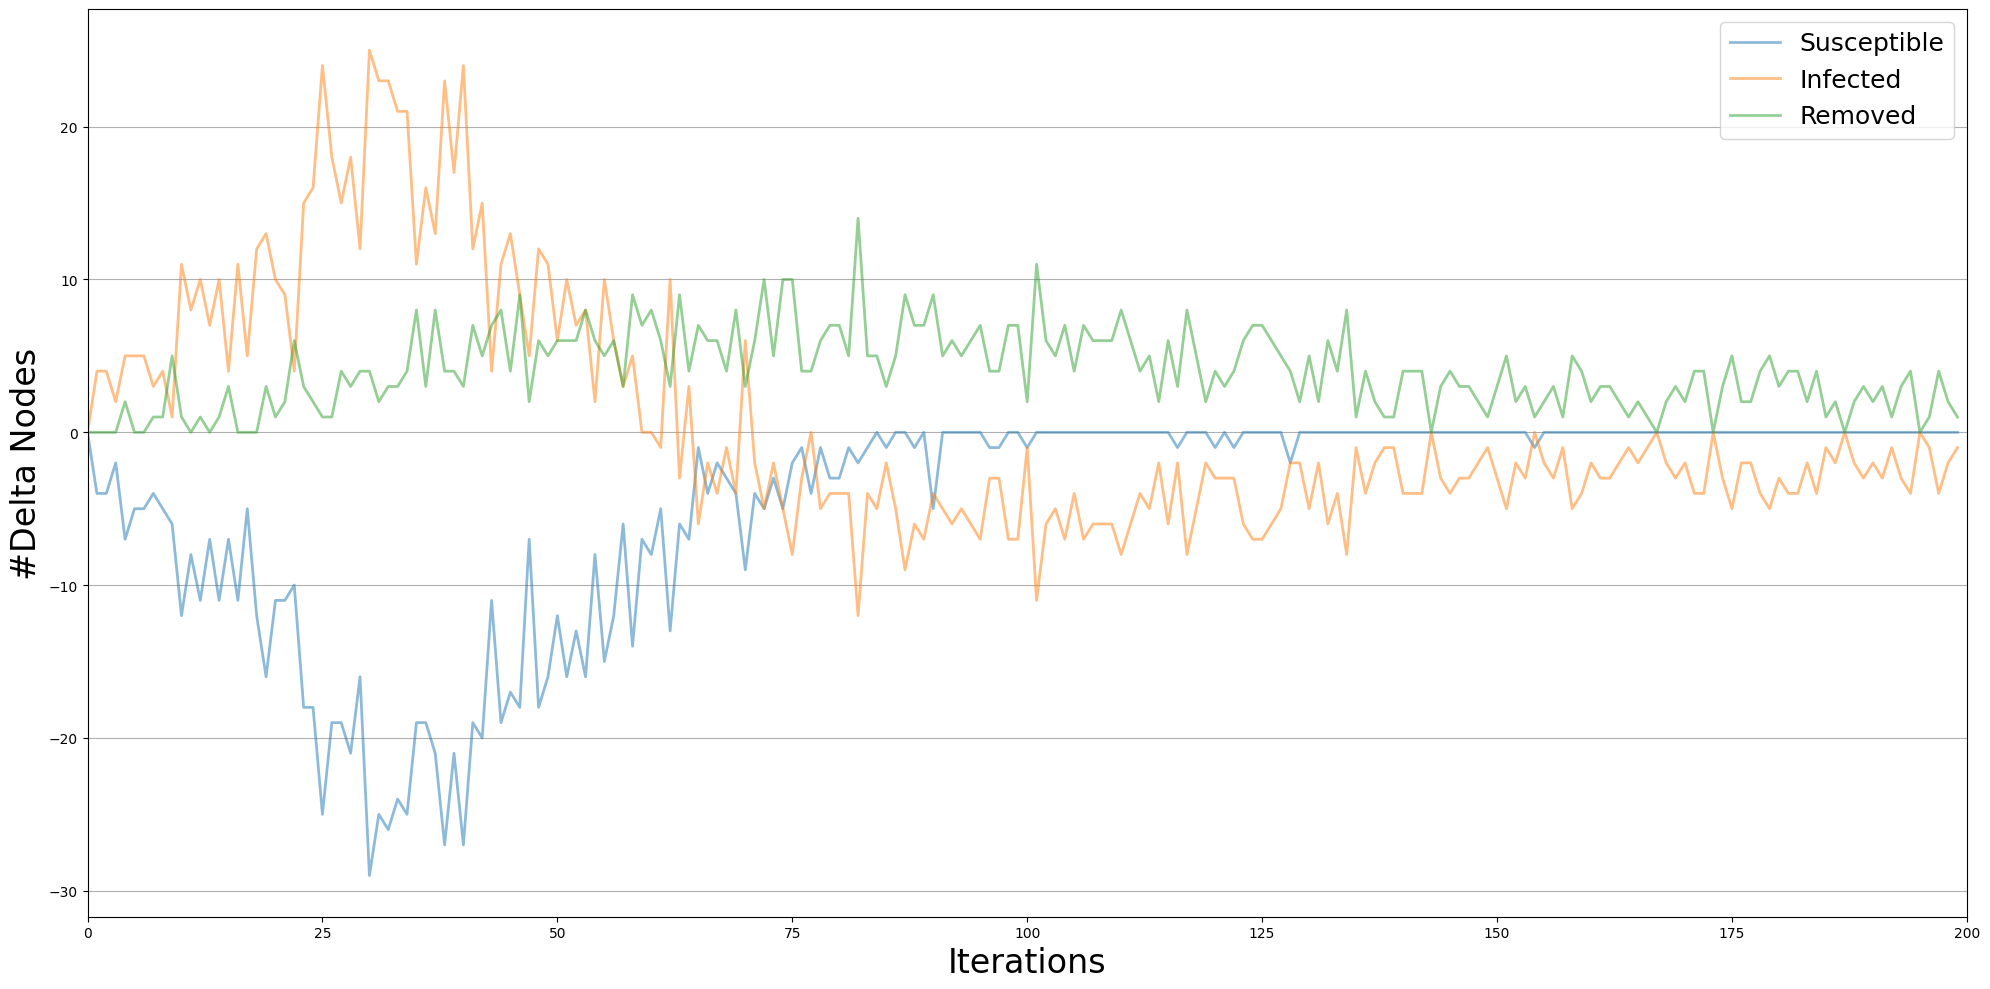

In [1]:
'''
SIR assumes that if, during a generic iteration, a susceptible node comes into contact with an infected one, it becomes infected with probability beta, than it can be switch to removed with probability gamma (the only transition allowed are S→I→R).

Statuses:
    - S: Susceptible
    - I: Infected
    - R: Removed
    
Parameters:
    - beta: Infection probability
    - gamma: Removal probability
    - fraction_infected: fraction of initially infected nodes
    - infected: list of infected nodes (has priority over fraction_infected)

'''
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
import json

# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = ep.SIRModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('gamma', 0.01)
config.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)
print(model.get_model_parameters())

%matplotlib inline
viz = DiffusionTrend(model, trends)
viz.plot()

viz = DiffusionPrevalence(model, trends)
viz.plot()
    
    